In [1]:
import equation
from equation import SDE, GeometricBrownianMotion1D, GeometricBrownianMotionND, BlackSchloesCall1D, EuropeanBasketOptionCall
import numpy as np
import matplotlib.pyplot as plt
import yaml
import pandas as pd

# Euler Method

Simulating Steps: 100%|██████████| 1000/1000 [00:05<00:00, 188.89it/s]


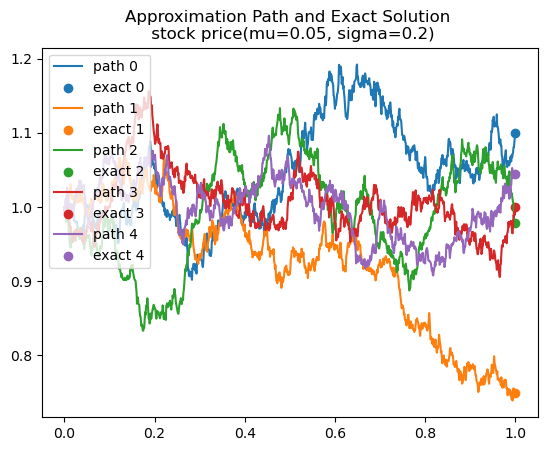

In [3]:
mu = 0.05  
sigma = 0.2
strike = 1.25
rf = 0.05
stock = GeometricBrownianMotion1D(mu, sigma, 'configs.yaml')
call = BlackSchloesCall1D(mu, sigma, strike, rf, configs='configs.yaml')
# y as call exact price
y_exact = call.exact_solution()

t, x, dw = stock.simulate(scheme='euler')
exact = stock.exact_solution(dw)
for i in range(5):
    plt.plot(t, x[i, :].reshape((call.N+1)), label=f'path {i}')
    plt.scatter(call.T, exact[i], label=f'exact {i}')
plt.title(f'Approximation Path and Exact Solution \n stock price(mu={mu}, sigma={sigma})')
# set legend location to upper left
plt.legend(loc='upper left')
plt.show()

In [3]:
x_T = x[:, -1]
y_T = []
for i in x_T:
    _ = call.terminal_condition(i)
    y_T.append(_)
y_T = np.array(y_T)
y_mc = y_T.mean()
T = call.T
print("exact price", y_exact)
print("Monte Carlo price", y_mc*np.exp(-rf*T))
print("Relative Error Ratio(%)", (y_exact - y_mc*np.exp(-rf*T))/y_exact*100)
# y_exact, y_mc*np.exp(-rf*T), (y_exact - y_mc*np.exp(-rf*T))/y_exact*100

exact price 0.023242744660152276
Monte Carlo price 0.023420095420676315
Relative Error Ratio(%) -0.7630370815375012


In [6]:
import numpy as np
x = np.zeros((1000, 1000+1, 5))  # shape: [M, step+1, N]
x0 = np.array([0.2 for i in range(5)]).reshape((5, 1))
x[:, 0, :] = x0.T
x[:, 0, :]

array([[0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       ...,
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2]])

In [12]:
mu = np.array([0.2*i for i in range(1, 6)]).reshape((5, 1))
sigma = np.array([[0.06*i for i in range(1, 6)] for j in range(5)])
strike = 0.5
rf = 0.05
shares = np.array([1000 for i in range(1, 6)]).reshape((5, 1))
x0 = np.array([0.2, 0.22, 0.24, 0.26, 0.28]).reshape((5, 1))
stock_index = EuropeanBasketOptionCall(mu, sigma, strike, rf, 'configs.yaml', shares, x0=x0)
t, x, dw = stock_index.simulate(scheme='euler')
y = stock_index.index(x)
y

Simulating Steps: 100%|██████████| 100/100 [00:00<00:00, 10269.84it/s]


array([[0.82914869],
       [1.63655189],
       [0.5574367 ],
       [0.39670368],
       [0.49291721]])

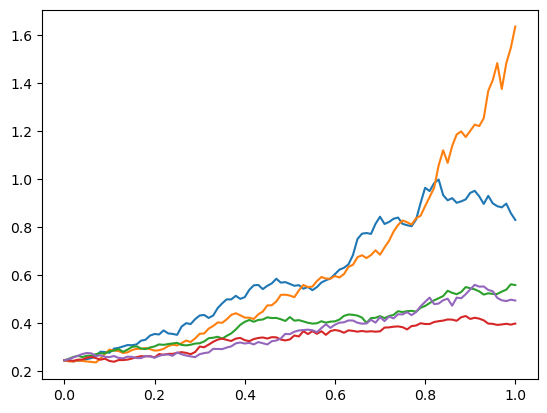

In [17]:
def index_price(time_step, x):
    xt = x[:, time_step, :]
    mv = xt @ shares
    weight = xt * shares.T / mv
    yt = (weight*xt).sum(axis=1)
    return yt
l = []
for i in range(101):
    l.append(index_price(i, x))
for i in range(5):
    plt.plot(t, [l[j][i] for j in range(101)], label=f'stock {i}')

In [4]:
x[:, 0, :]

array([[0.2 , 0.22, 0.24, 0.26, 0.28],
       [0.2 , 0.22, 0.24, 0.26, 0.28],
       [0.2 , 0.22, 0.24, 0.26, 0.28],
       [0.2 , 0.22, 0.24, 0.26, 0.28],
       [0.2 , 0.22, 0.24, 0.26, 0.28],
       [0.2 , 0.22, 0.24, 0.26, 0.28]])

In [21]:
a = np.array([1])
max(0, a)

array([1])